In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/finalproject/RFLFSODataFull.csv')

Exploratory Data Analysis

In [3]:
df.head()

,FSO_Att,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,...,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin
0,7.913289,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.0,0.0,0.0,...,26.603030,24.680849,9,65884.51846,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939
1,7.451176,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.0,0.0,0.0,...,26.377164,24.313108,9,64963.41092,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393
2,7.072747,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.0,0.0,0.0,...,27.670822,23.150277,10,54794.28107,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809
3,6.949288,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.0,0.0,0.0,...,26.522100,23.174815,10,50205.64159,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951
4,7.361052,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.0,0.0,0.0,...,26.305736,24.864100,10,59038.32599,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

FSO_Att                  0
RFL_Att                  0
AbsoluteHumidity         0
AbsoluteHumidityMax      0
AbsoluteHumidityMin      0
Distance                 0
Frequency                0
Particulate              0
ParticulateMax           0
ParticulateMin           0
RainIntensity            0
RainIntensityMax         0
RainIntensityMin         0
RelativeHumidity         0
SYNOPCode                0
Temperature              0
TemperatureDifference    0
TemperatureMax           0
TemperatureMin           0
Time                     0
Visibility               0
VisibilityMax            0
VisibilityMin            0
WindDirection            0
WindSpeed                0
WindSpeedMax             0
WindSpeedMin             0
dtype: int64


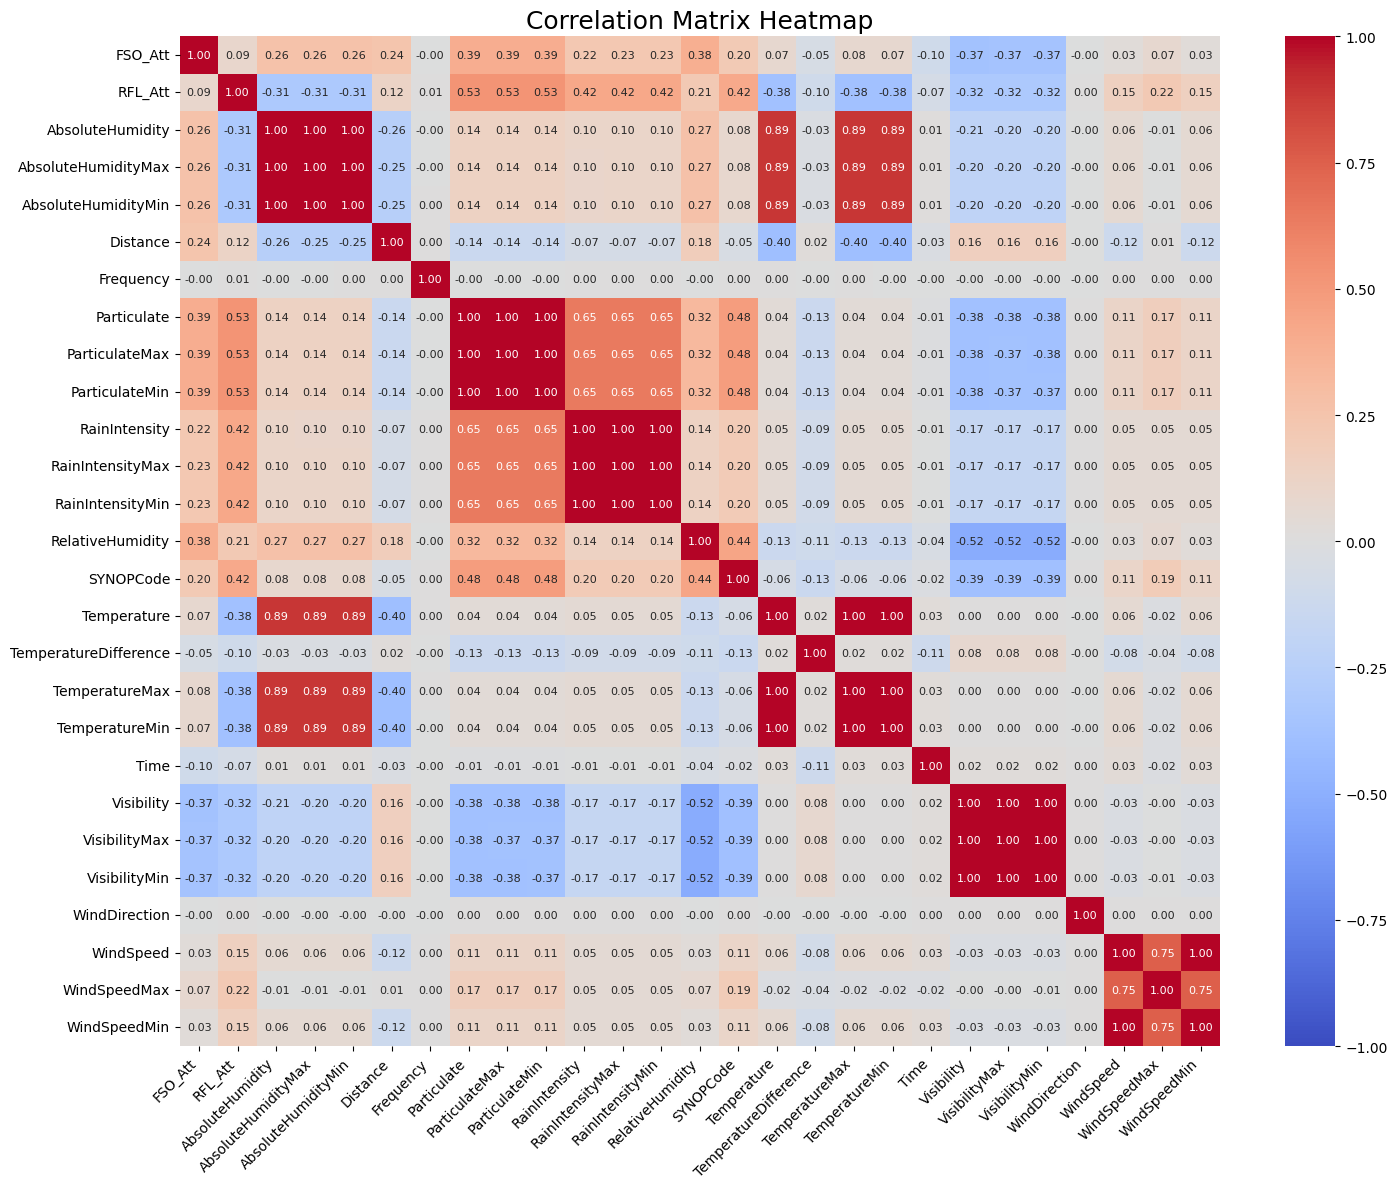

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot_kws={"size": 8}
)
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

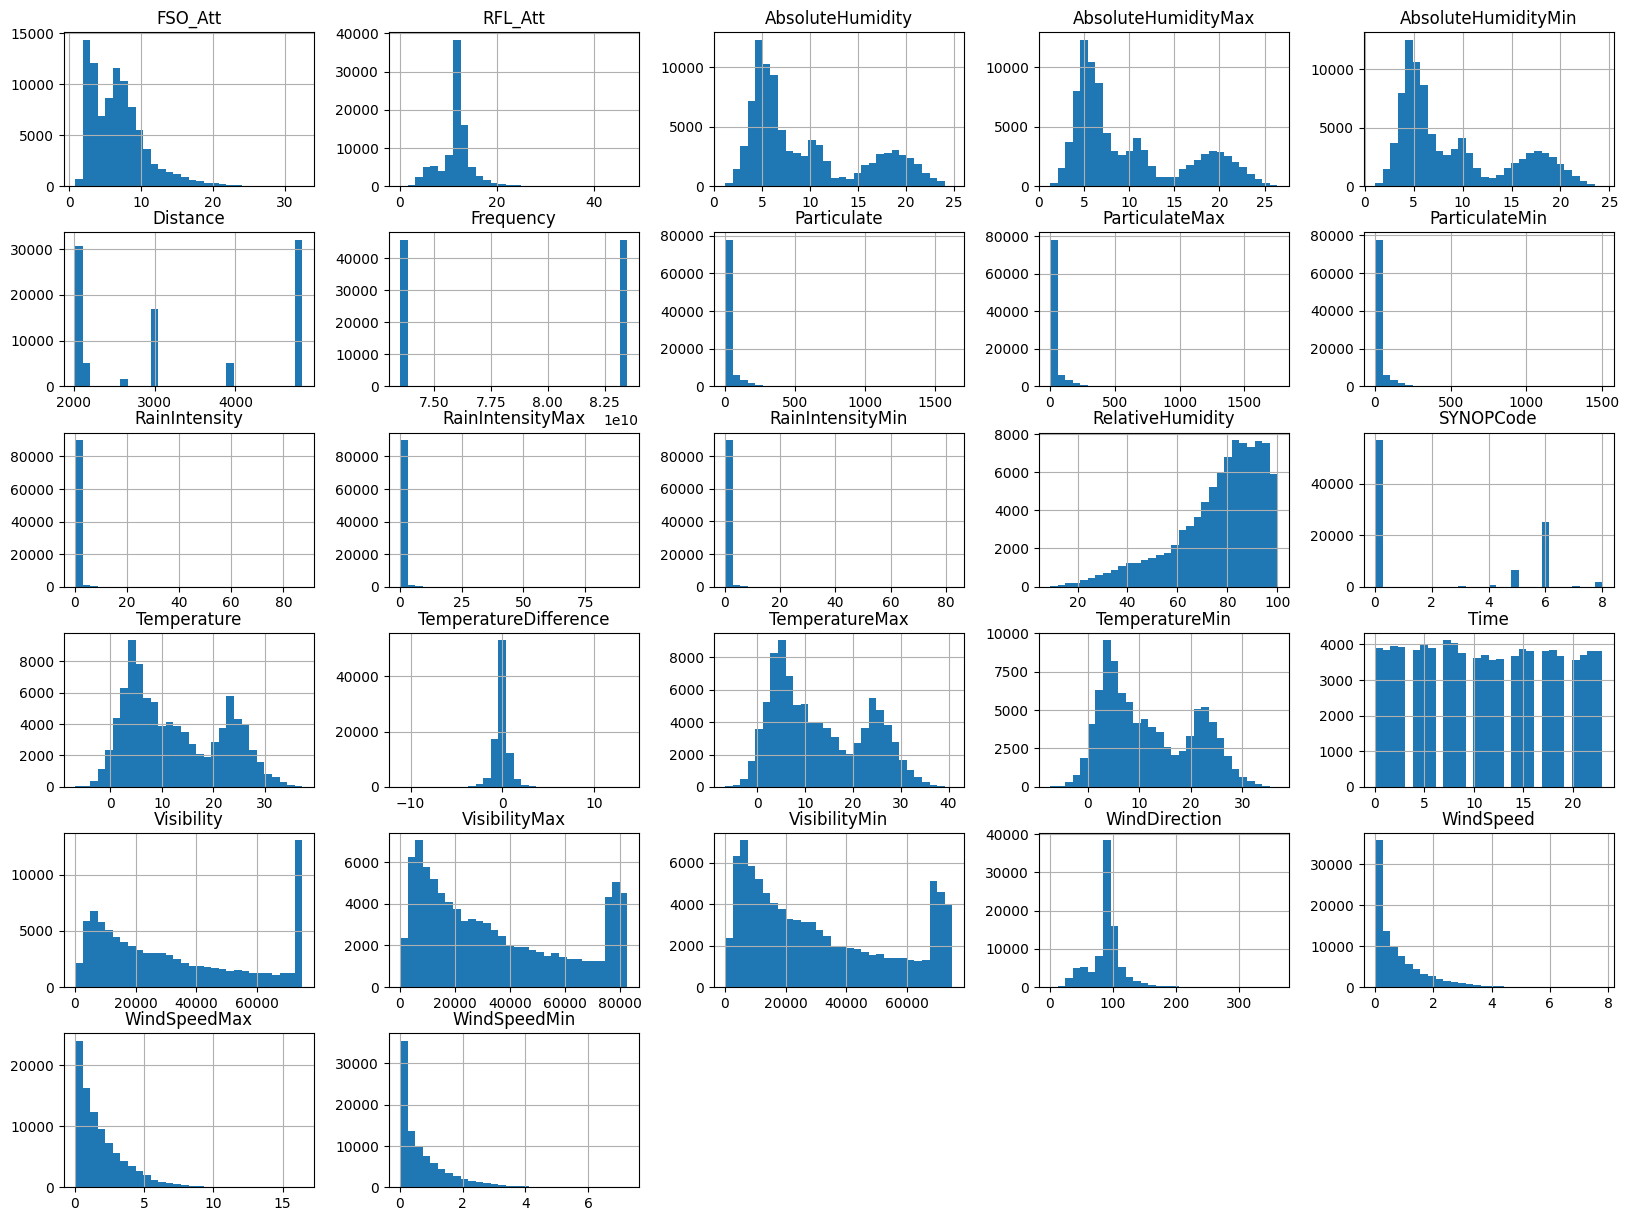

In [7]:

df.hist(bins=30, figsize=(20,15))
plt.show()


Downsampling

Finding out the number of distinct distances present in the dataset

In [5]:
unique_groups = df['Distance'].nunique()
print("Number of unique groups in Distance")
print(unique_groups)

Number of unique groups in each column:
91252


Rounding off the distance and adding it as a new column to the dataset

In [8]:
df['RDistance'] = df['Distance'].round()

Sorting the data by making use of SYNOP Code, RDistance and Time

In [12]:
cols = ['SYNOPCode', 'RDistance', 'Time']

In [13]:
group_sizes = df.groupby(cols).size()
print(group_sizes)

SYNOPCode  RDistance  Time
0          2012.0     0       31
                      1       33
                      2       37
                      3       33
                      4       38
                              ..
8          4828.0     17       3
                      19       4
                      20       2
                      22       2
                      23       2
Length: 4659, dtype: int64


In [26]:
cols = ['RDistance']
group_sizes = df.groupby(cols).size()
print(group_sizes)

RDistance
2012.0    1538
2013.0    3054
2014.0    3070
2015.0    3094
2016.0    3088
          ... 
4824.0    3256
4825.0    3237
4826.0    3167
4827.0    3232
4828.0    1615
Length: 66, dtype: int64


In [15]:
group_sizes_df = group_sizes.reset_index(name='GroupSize')

In [17]:
group_sizes.head()

SYNOPCode  RDistance  Time
0          2012.0     0       31
                      1       33
                      2       37
                      3       33
                      4       38
dtype: int64

Printing the most commonly repeated distances, time in SYNOP Code

In [19]:
target_synop_code = 3
filtered_df = group_sizes_df[group_sizes_df['SYNOPCode'] == target_synop_code]
result_df = filtered_df[['RDistance', 'Time']]
print(f"Distances and Times for SYNOPCode '{target_synop_code}':")
print(result_df)

Distances and Times for SYNOPCode '3':
      RDistance  Time
1582     2012.0     0
1583     2012.0     5
1584     2013.0     0
1585     2013.0     6
1586     2013.0     8
...         ...   ...
1686     4826.0     6
1687     4827.0     2
1688     4827.0     4
1689     4827.0     5
1690     4827.0     6

[109 rows x 2 columns]


In [22]:
cols = ['RDistance']

In [23]:
group_sizes = result_df.groupby(cols).size()
print(group_sizes)

RDistance
2012.0    2
2013.0    3
2014.0    5
2015.0    4
2016.0    1
2017.0    4
2018.0    4
2019.0    4
2020.0    4
2021.0    1
2022.0    4
2116.0    1
2119.0    1
2955.0    3
2956.0    3
2957.0    5
2958.0    4
2959.0    4
2960.0    5
2961.0    4
2962.0    5
2963.0    4
2964.0    3
2965.0    2
4818.0    3
4819.0    2
4820.0    3
4821.0    3
4822.0    2
4823.0    2
4824.0    4
4825.0    2
4826.0    4
4827.0    4
dtype: int64


In [24]:
cols = ['Time']

In [25]:
group_sizes = result_df.groupby(cols).size()
print(group_sizes)

Time
0     10
1      2
2      3
4     12
5     13
6     17
8      8
14     4
15    10
16     8
17     8
18     3
19    11
dtype: int64


Downsampling the remaining SYNOP Code based on the most commonly repeating distance and time in SYNOP Code 3

In [ ]:
target_synop_code = 0
distance_range_1 = (2012, 2022)
distance_range_2 = (2955, 2965)
distance_range_3 = (4818, 4827)
time_range = (0, 19)
filtered_df = df[
    (df['SYNOPCode'] == target_synop_code) &
    (
        ((df['RDistance'] >= distance_range_1[0]) & (df['RDistance'] <= distance_range_1[1])) |
        ((df['RDistance'] >= distance_range_2[0]) & (df['RDistance'] <= distance_range_2[1])) |
        ((df['RDistance'] >= distance_range_3[0]) & (df['RDistance'] <= distance_range_3[1]))
    ) &
    (df['Time'] >= time_range[0]) & (df['Time'] <= time_range[1])
]
selected_entries = filtered_df.sample(n=191, random_state=42)

Merging all the dataframes into a single dataframe

In [42]:
merged_df = pd.concat([selected_entries0, selected_entries4, selected_entries5, selected_entries6, selected_entries7, selected_entries8], ignore_index=True)

In [44]:
target_value = 3
filtered_df1 = df[df['SYNOPCode'] == target_value]

In [45]:
merged_df = pd.concat([merged_df, filtered_df1], ignore_index=True)

In [46]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                1337 non-null   float64
 1   RFL_Att                1337 non-null   float64
 2   AbsoluteHumidity       1337 non-null   float64
 3   AbsoluteHumidityMax    1337 non-null   float64
 4   AbsoluteHumidityMin    1337 non-null   float64
 5   Distance               1337 non-null   float64
 6   Frequency              1337 non-null   int64  
 7   Particulate            1337 non-null   float64
 8   ParticulateMax         1337 non-null   float64
 9   ParticulateMin         1337 non-null   float64
 10  RainIntensity          1337 non-null   float64
 11  RainIntensityMax       1337 non-null   float64
 12  RainIntensityMin       1337 non-null   float64
 13  RelativeHumidity       1337 non-null   float64
 14  SYNOPCode              1337 non-null   int64  
 15  Temp

Dropping RDistance and Time columns

In [47]:
cols = ['RDistance', 'Time']

In [50]:
merged_df = merged_df.drop(cols, axis=1)

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FSO_Att                1337 non-null   float64
 1   RFL_Att                1337 non-null   float64
 2   AbsoluteHumidity       1337 non-null   float64
 3   AbsoluteHumidityMax    1337 non-null   float64
 4   AbsoluteHumidityMin    1337 non-null   float64
 5   Distance               1337 non-null   float64
 6   Frequency              1337 non-null   int64  
 7   Particulate            1337 non-null   float64
 8   ParticulateMax         1337 non-null   float64
 9   ParticulateMin         1337 non-null   float64
 10  RainIntensity          1337 non-null   float64
 11  RainIntensityMax       1337 non-null   float64
 12  RainIntensityMin       1337 non-null   float64
 13  RelativeHumidity       1337 non-null   float64
 14  SYNOPCode              1337 non-null   int64  
 15  Temp

Save the downsampled data as a csv file

In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

print("DataFrame saved as 'merged_data.csv'.")